In [1]:
# %load visualize_filter.py
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from matplotlib.image import imread
from common.layers import Convolution

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet


def box_off():
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_axis_off()    

In [2]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_axis_off()  


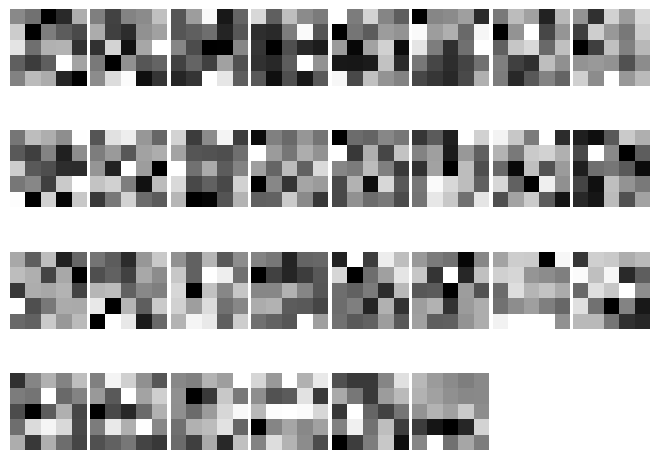

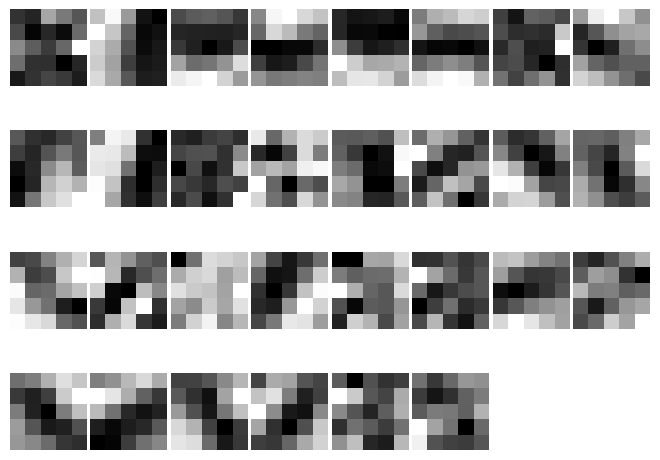

In [3]:
network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

In [4]:
# # %load apply_filter.py

# network = SimpleConvNet(input_dim=(1,28,28), 
#                         conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
#                         hidden_size=100, output_size=10, weight_init_std=0.01)

# # 학습된 가중치
# network.load_params("params.pkl")

# filter_show(network.params['W1'], 16)

(-0.5, 249.5, 332.5, -0.5)

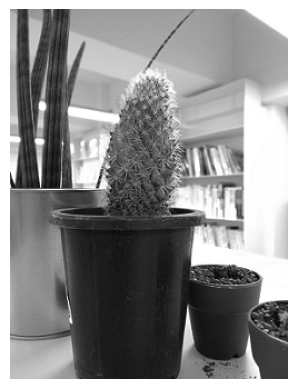

In [5]:
img = imread('../dataset/cactus_gray.png')
plt.imshow(img, cmap='gray')
plt.axis('off')

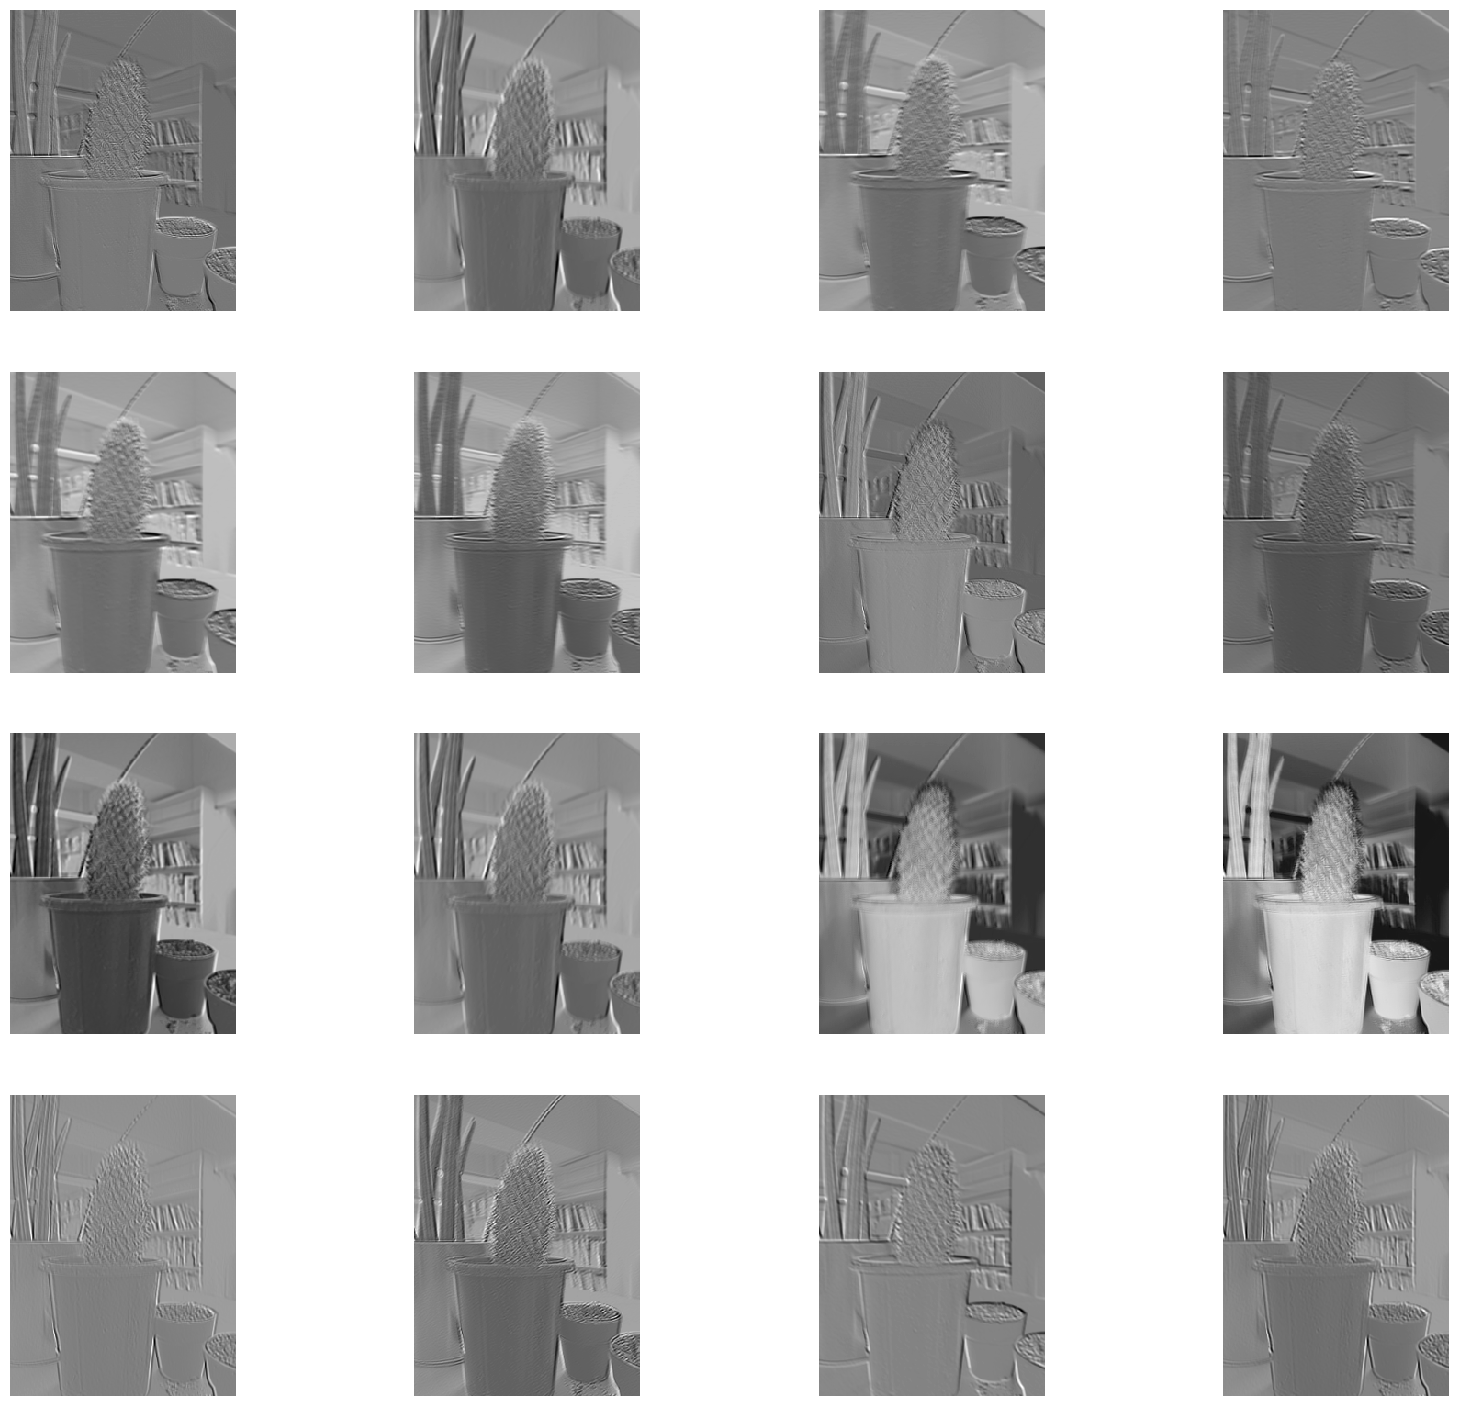

In [6]:
if img.ndim < 4:
    img = img.reshape(1, 1, *img.shape)

fig = plt.figure(figsize=(20,18))

w_idx = 1
out_list = []
for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]

    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b)
    out = conv_layer.forward(img)
    out = out.reshape(out.shape[2], out.shape[3])
    out_list.append(out)
    
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_axis_off()  

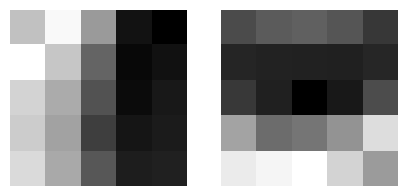

In [7]:
fig = plt.figure(figsize=(5,2.5))

ax = fig.add_subplot(1,2,1)
ax.imshow(network.params['W1'][1,0], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 

ax = fig.add_subplot(1,2,2)
ax.imshow(network.params['W1'][2,0], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 

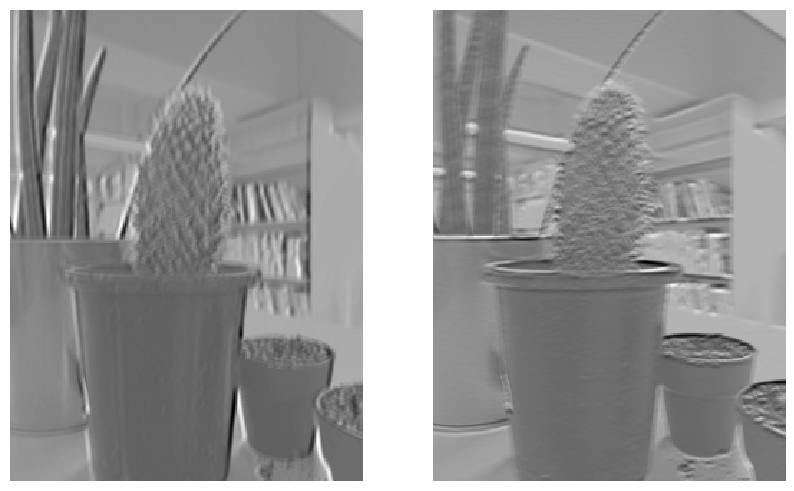

In [8]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,2,1)
ax.imshow(out_list[1], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 

ax = fig.add_subplot(1,2,2)
ax.imshow(out_list[2], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 